In [1]:
#@title **Importar Bibliotecas** { vertical-output: true, form-width: "60%" }

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gdown

In [19]:
#@title **Importar amostras de 100.000 em cada dataset por link compartilhado** { vertical-output: true, form-width: "60%" }
# Amostra SRAG
srag_file_id = '1E1N10m0YPm0g2PvAnSO5YYc1sFfqrzRi'
srag_url = f'https://drive.google.com/uc?id={srag_file_id}'
srag_output = 'SRAG-2021-RESIZED.csv'
gdown.download(srag_url, srag_output, quiet=False)
df_srag = pd.read_csv(srag_output, sep=',')

# Amostra SIM
sim_file_id = '1P1-TtXlJMgyvVPStpAWHUES55ZqSMoq2'
sim_url = f'https://drive.google.com/uc?id={sim_file_id}'
sim_output = 'SIM-2021-RESIZED.csv'
gdown.download(sim_url, sim_output, quiet=False)
df_sim = pd.read_csv(sim_output, sep=',')



Downloading...
From: https://drive.google.com/uc?id=1E1N10m0YPm0g2PvAnSO5YYc1sFfqrzRi
To: /content/SRAG-2021-RESIZED.csv
100%|██████████| 56.7M/56.7M [00:00<00:00, 178MB/s]
/tmp/ipython-input-19-3330152542.py:7: DtypeWarning: Columns (59,61,62,63,91,105,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_srag = pd.read_csv(srag_output, sep=',')
Downloading...
From: https://drive.google.com/uc?id=1P1-TtXlJMgyvVPStpAWHUES55ZqSMoq2
To: /content/SIM-2021-RESIZED.csv
100%|██████████| 29.5M/29.5M [00:00<00:00, 126MB/s]


NATURAL
835.0    16982
831.0    12886
829.0     8303
833.0     6999
843.0     6868
         ...  
275.0        1
140.0        1
18.0         1
45.0         1
62.0         1
Name: count, Length: 93, dtype: int64


/tmp/ipython-input-19-3330152542.py:14: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sim = pd.read_csv(sim_output, sep=',')



Mediana de taxa de internações SRAG por UF: 40.311344868320944
Número de UFs no grupo de alta incidência: 13
Número de UFs no grupo de baixa incidência: 14

Teste Shapiro-Wilk para Idade Média ao Óbito (Alta Incidência SRAG): Estatística=0.9230, p-valor=0.2752
Teste Shapiro-Wilk para Idade Média ao Óbito (Baixa Incidência SRAG): Estatística=0.9219, p-valor=0.2341

Teste t independente comparando a Idade Média ao Óbito entre grupos de Alta vs. Baixa Incidência SRAG:
Estatística t: 2.6784
P-valor: 0.0129
Resultado: O p-valor (0.0129) é menor que o nível de significância (0.05).
Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa na idade média ao óbito entre regiões com alta e baixa incidência de internações SRAG.

Estatísticas Descritivas da Idade Média ao Óbito por Grupo:
Grupo Alta Incidência SRAG:
count    13.000000
mean     65.147739
std       2.240353
min      61.769870
25%      63.020190
50%      65.161137
75%      66.893833
max      68.601960
Name: Media_

/tmp/ipython-input-80-356740111.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Grupo', y='Idade', palette=['skyblue', 'lightcoral'])


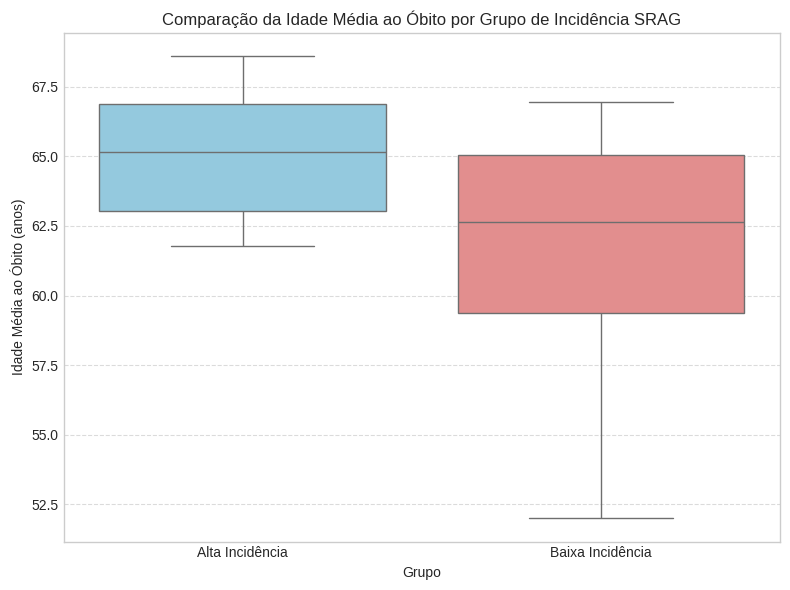

In [80]:
# Calcular a idade média ao óbito por município/estado (SIM)

# Converte a coluna 'municipio' para string (.astype(str))
# e pega os 2 primeiros caracteres de cada linha (.str[:2])
df_sim['UF'] = df_sim['CODMUNOCOR'].astype(str).str[:2]

# Mapeia as UFs conforme seus códigos

mapa_uf = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL', '28': 'SE', '29': 'BA',
    '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS',
    '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}

df_sim['UF'] = df_sim['UF'].map(mapa_uf)




# Coluna com as idades todas em anos

# Função para calcular a idade em anos
def calcular_idade_em_anos(idade_cod):
    idade_str = str(idade_cod)
    if len(idade_str) < 2:
        # Caso idade_str inválida, retornar NaN ou outro valor padrão
        return np.nan
    # Extrai a unidade e o valor
    unidade = idade_str[0]
    valor = int(idade_str[1:])

    # Aplica as regras de conversão
    if unidade == '1': # Minutos
        # Converte minutos para anos (1 ano = 365.25 dias * 24 horas * 60 min)
        return valor / (60 * 24 * 365.25)
    elif unidade == '2': # Horas
        # Converte horas para anos
        return valor / (24 * 365.25)
    elif unidade == '3': # Meses
        # Converte meses para anos
        return valor / 12.0
    elif unidade == '4': # Anos
        return float(valor)
    elif unidade == '5': # Idade > 100 anos
        return float(100 + valor)
    elif unidade == '9': # Ignorado
        return np.nan
    else:
        return np.nan

df_sim['IDADE_ANOS'] = df_sim['IDADE'].apply(calcular_idade_em_anos)



df_sim['IDADE_ANOS'] = pd.to_numeric(df_sim['IDADE_ANOS'], errors='coerce')



# Agrupar por UF (Estado) e calcular a idade média ao óbito
media_idade_obito_por_uf = df_sim.groupby('UF')['IDADE_ANOS'].mean().reset_index()
media_idade_obito_por_uf.rename(columns={'IDADE_ANOS': 'Media_Idade_Obito'}, inplace=True)


# Calcular a taxa de internações SRAG por região (UF)
# Contar o número de internações por UF em df_srag
internacoes_srag_por_uf = df_srag['SG_UF_NOT'].value_counts().reset_index()
internacoes_srag_por_uf.rename(columns={ 'SG_UF_NOT': 'UF', 'count': 'Contagem'}, inplace=True)



# Para calcular a taxa, precisaríamos da população de cada UF.
# Como não temos os dados de população, utilizamos os dados do IBGE.

# Lista de dados com nomes, siglas e população
dados = [
    ('RO', 1815278),
    ('AC', 906876),
    ('AM', 4269995),
    ('RR', 652713),
    ('PA', 8777124),
    ('AP', 877613),
    ('TO', 1607363),
    ('MA', 7153262),
    ('PI', 3289290),
    ('CE', 9240580),
    ('RN', 3560903),
    ('PB', 4059905),
    ('PE', 9674793),
    ('AL', 3365351),
    ('SE', 2338474),
    ('BA', 14985284),
    ('MG', 21411923),
    ('ES', 4108508),
    ('RJ', 17463349),
    ('SP', 46649132),
    ('PR', 11597484),
    ('SC', 7338473),
    ('RS', 11466630),
    ('MS', 2839188),
    ('MT', 3567234),
    ('GO', 7206589),
    ('DF', 3094325)
]

# Criar DataFrame
df_populacao = pd.DataFrame(dados, columns=['UF', 'Populacao'])


# Unir os dados de internação com os de população
df_com_populacao = pd.merge(internacoes_srag_por_uf, df_populacao, on='UF')

# Calcular a taxa
df_com_populacao['Taxa_Internacao'] = (df_com_populacao['Contagem'] / df_com_populacao['Populacao']) * 100000

# Unir com os dados de idade média ao óbito
df_comparacao = pd.merge(media_idade_obito_por_uf, df_com_populacao, on='UF', how='inner')

# Separar os grupos usando a mediana da taxa
mediana_taxa_internacoes = df_comparacao['Taxa_Internacao'].median()
df_alta_incidencia = df_comparacao[df_comparacao['Taxa_Internacao'] > mediana_taxa_internacoes]
df_baixa_incidencia = df_comparacao[df_comparacao['Taxa_Internacao'] <= mediana_taxa_internacoes]




print(f"\nMediana de taxa de internações SRAG por UF: {mediana_taxa_internacoes}")
print(f"Número de UFs no grupo de alta incidência: {len(df_alta_incidencia)}")
print(f"Número de UFs no grupo de baixa incidência: {len(df_baixa_incidencia)}")






# Teste de normalidade (Shapiro-Wilk) para a idade média ao óbito em cada grupo

shapiro_alta = stats.shapiro(df_alta_incidencia['Media_Idade_Obito'])
shapiro_baixa = stats.shapiro(df_baixa_incidencia['Media_Idade_Obito'])

print(f"\nTeste Shapiro-Wilk para Idade Média ao Óbito (Alta Incidência SRAG): Estatística={shapiro_alta[0]:.4f}, p-valor={shapiro_alta[1]:.4f}")
print(f"Teste Shapiro-Wilk para Idade Média ao Óbito (Baixa Incidência SRAG): Estatística={shapiro_baixa[0]:.4f}, p-valor={shapiro_baixa[1]:.4f}")

# Teste t para comparar as médias de idade ao óbito entre os dois grupos
# Aqui, vamos assumir variâncias iguais para o teste t padrão.

# Verificando se há dados suficientes em ambos os grupos para o teste t
if len(df_alta_incidencia) < 2 or len(df_baixa_incidencia) < 2:
    print("\nNão há dados suficientes em um ou ambos os grupos para realizar o teste t.")
else:
    # Perform independent samples t-test
    t_stat, p_value = stats.ttest_ind(df_alta_incidencia['Media_Idade_Obito'],
                                       df_baixa_incidencia['Media_Idade_Obito'],
                                       equal_var=True)

    print(f"\nTeste t independente comparando a Idade Média ao Óbito entre grupos de Alta vs. Baixa Incidência SRAG:")
    print(f"Estatística t: {t_stat:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Interpretação do resultado
    alpha = 0.05
    if p_value < alpha:
        print(f"Resultado: O p-valor ({p_value:.4f}) é menor que o nível de significância ({alpha}).")
        print("Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa na idade média ao óbito entre regiões com alta e baixa incidência de internações SRAG.")
    else:
        print(f"Resultado: O p-valor ({p_value:.4f}) é maior que o nível de significância ({alpha}).")
        print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar uma diferença estatisticamente significativa na idade média ao óbito entre regiões com alta e baixa incidência de internações SRAG.")

    # Análise descritiva dos grupos
    print("\nEstatísticas Descritivas da Idade Média ao Óbito por Grupo:")
    print("Grupo Alta Incidência SRAG:")
    print(df_alta_incidencia['Media_Idade_Obito'].describe())
    print("\nGrupo Baixa Incidência SRAG:")
    print(df_baixa_incidencia['Media_Idade_Obito'].describe())

    print(f"Alta: {len(df_alta_incidencia)} valores, Baixa: {len(df_baixa_incidencia)} valores")



    # DataFrame para o boxplot
df_plot = pd.concat([
    pd.DataFrame({
        'Grupo': 'Alta Incidência',
        'Idade': df_alta_incidencia['Media_Idade_Obito']
    }),
    pd.DataFrame({
        'Grupo': 'Baixa Incidência',
        'Idade': df_baixa_incidencia['Media_Idade_Obito']
    })
])

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_plot, x='Grupo', y='Idade', palette=['skyblue', 'lightcoral'])
plt.ylabel('Idade Média ao Óbito (anos)')
plt.title('Comparação da Idade Média ao Óbito por Grupo de Incidência SRAG')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()